infoGAN，一种特征维度的变更对输出的影响的方法。

一般会认为隐变量的某个维度应该是代表着某个特征的，对其进行变化，对输出也是跟着变化的，而实际可能并非如此，一个特征可能分布在多个维度... 那么该如何检测呢，就可以使用infoGAN，方法如下：

使用某个可能会影响x的向量（如长度，旋转等特征），使用分类器如果能够还原回来，就说明这个特征对x是有影响的，且是确定的特征...（也就是说，我们可以使用infoGAN来对某个特征维度进行判断其对输出的影响，而不是随机修改，通过观察来判定，这就更像提供一个判定的技术方法）

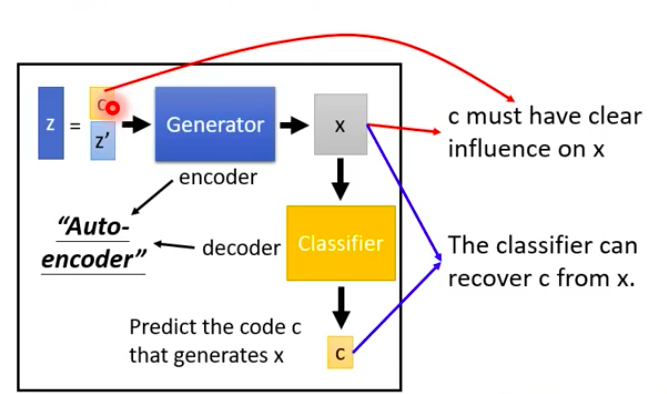

VAE GAN

在使用VAE的时候，一般来说产生的，比如图像都很模糊，也没有一个衡量的标准，是好是坏，因为它是根据原图的分布来生成的，效果不好，加上GAN的判别器就可以解决这个问题...

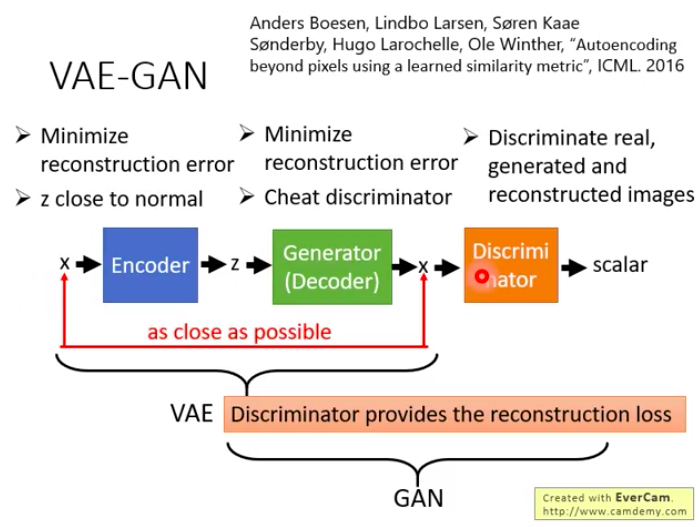

算法步骤：

* 初始化编码器、解码器和判别器
* 每次迭代：
    * 从数据中sample出M个图像样本，$\{x^1, x^2, \cdots, x^M\}$
    * 使用编码器生成M个codes，$\{\tilde{z}^1,\tilde{z}^2,\cdots,\tilde{z}^M\}$
        * $\tilde{x}^i=En(x^i)$
    * 使用解码器生成M个图像样本，$\tilde{x}^1,\tilde{x}^2,\cdots,\tilde{x}^M$
        * $\tilde{x}^i=De(x^i)$
    * 从先验$P(z)$分布中sample出M个codes，$\{z^1,z^2, \cdots, z^M\}$（这个先验分布，不同于编码器生成的code z）
    * 使用解码器生成M个图像样本，$\{\hat{x}^1, \hat{x}^2, \cdots, \hat{x}^M\}$
        * $\hat{x}^i=De(z^i)$
    * 更新En，使得$\|\tilde{x}^i - x^i\|$（最小化自编码器的重构误差），$KL(P(\tilde{z}^i|x^i)\|P(z))$最小化（最小化生成器的分布与编码器分布的距离）
    * 更新De，使得$\|\tilde{x}^i - x^i\|$最小化（最小化自编码器的重构误差），使得$Dis(\tilde{x}^i)$和$Dis(\hat{x}^i)$最大化（最大化判别器的输出值）
    * 更新Dis使得$Dis(x^i)$最大化（最大化真实输出），使得$Dis(\tilde{x}^i)$和$Dis(\hat{x}^i)$最小化（最小化生成器的输出）

BiGAN

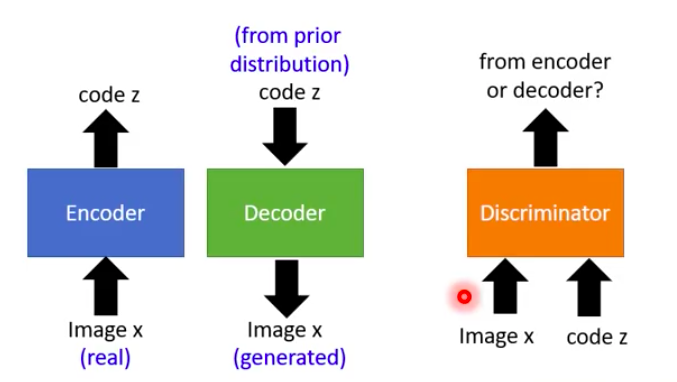

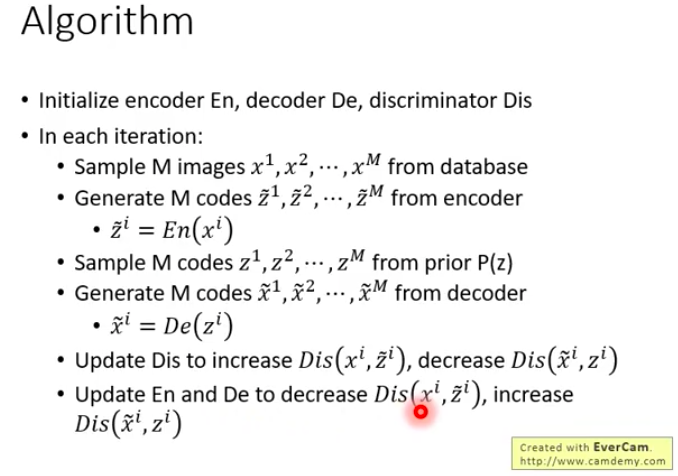

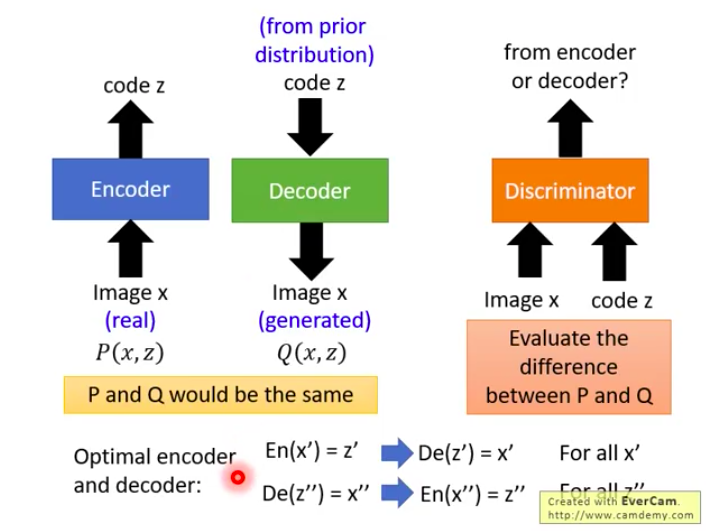

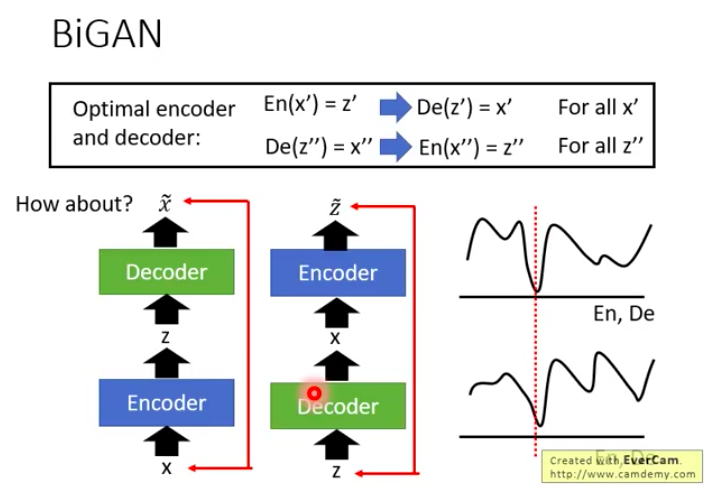

单纯使用自编码器来训练得到的结果是很模糊的，也不能有形式上的变化，而使用biGAN则不一样，会有形式上的区别...

Triple GAN

也是一个半监督的学习方法

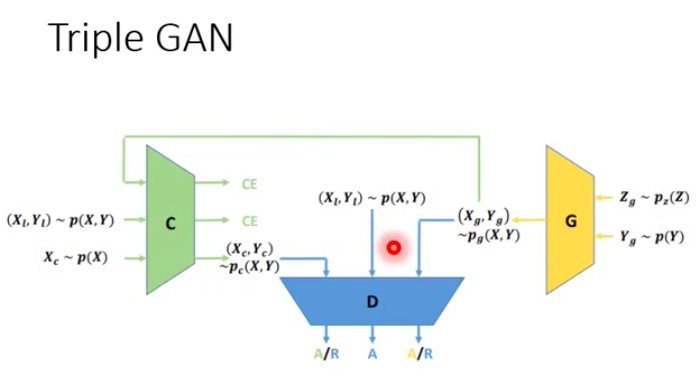

Domain-adversarial training

对于有些问题，比如有背景知识的分类问题，或者说是有领域知识嵌入的问题，我们也希望能够实现正常的分类，这个时候，就需要最大化分类，最小化领域知识分类，如下所示：

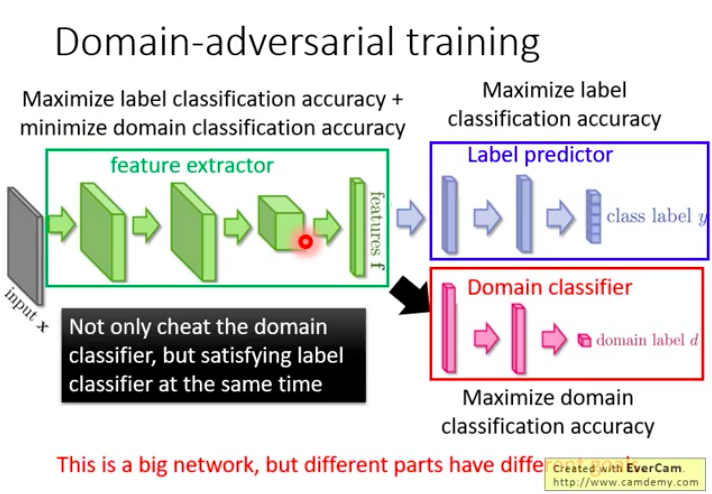

这类问题，比如我们可以应用在语音上，语音里的内容不仅包括发音部分还有不同语音的内容，我们可以将其看做是需要识别出任何人的语音内容，将其分开，一个发音，一个语者...

将语音中的发音和语者信息分开，比如语者信息用于对声纹比对，即使是不同的发音内容，
发音是对不同语言内容的识别，可用于对话等...

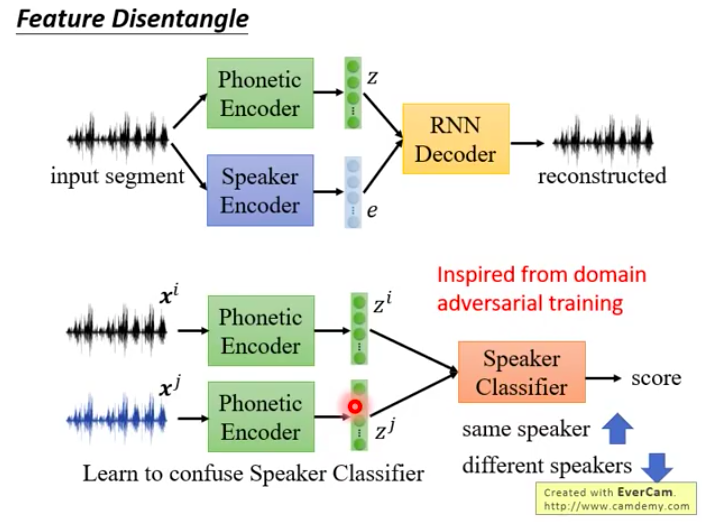